# **9. Additional Linear Modeling Topics**

## **9.1 Handling Highly Correlated Variables**

### **9.1.1 An Initial Linear Model of Online Spend**

In [4]:
(cust.df = read.csv('http://goo.gl/PmPkaG'))

cust.id,age,credit.score,email,distance.to.store,online.visits,online.trans,online.spend,store.trans,store.spend,sat.service,sat.selection
1,22.89437,630.6089,yes,2.582494,20,3,58.42999,4,140.32321,3,3
2,28.04994,748.5746,yes,48.175989,121,39,756.88008,0,0.00000,3,3
3,35.87942,732.5459,yes,1.285712,39,14,250.32801,0,0.00000,NA,NA
4,30.52740,829.5889,yes,5.253992,1,0,0.00000,2,95.91194,4,2
5,38.73575,733.7968,no,25.044693,35,11,204.69331,0,0.00000,1,1
6,42.41277,685.8721,yes,18.462041,1,1,19.01065,0,0.00000,NA,NA
7,28.29395,724.5464,yes,9.344021,1,1,18.71620,2,63.52374,3,3
8,36.49065,748.5761,yes,6.917499,48,13,255.81918,4,74.98433,2,3
9,30.37076,689.6656,no,12.848213,0,0,0.00000,0,0.00000,4,2
10,26.58999,786.5158,no,6.618326,14,6,123.67176,3,103.41961,3,2


In [5]:
summary(cust.df)

    cust.id            age         credit.score   email     distance.to.store 
 Min.   :   1.0   Min.   :19.34   Min.   :543.0   no :186   Min.   :  0.2136  
 1st Qu.: 250.8   1st Qu.:31.43   1st Qu.:691.7   yes:814   1st Qu.:  3.3383  
 Median : 500.5   Median :35.10   Median :725.5             Median :  7.1317  
 Mean   : 500.5   Mean   :34.92   Mean   :725.5             Mean   : 14.6553  
 3rd Qu.: 750.2   3rd Qu.:38.20   3rd Qu.:757.2             3rd Qu.: 16.6589  
 Max.   :1000.0   Max.   :51.86   Max.   :880.8             Max.   :267.0864  
                                                                              
 online.visits     online.trans      online.spend      store.trans    
 Min.   :  0.00   Min.   :  0.000   Min.   :   0.00   Min.   : 0.000  
 1st Qu.:  0.00   1st Qu.:  0.000   1st Qu.:   0.00   1st Qu.: 0.000  
 Median :  6.00   Median :  2.000   Median :  37.03   Median : 1.000  
 Mean   : 28.29   Mean   :  8.385   Mean   : 170.32   Mean   : 1.323  
 3rd Qu.: 31.

Now we use lm() to model spend as a function of all other variables (online.spend ∼ .). We omit customers with zero online spend; having exactly zero spend is probably related to different factors than positive spend, and we are interested here in the associations for those who spend anything. We also index[ , -1] to omit the customer ID column:

In [6]:
spend.m1 = lm(online.spend ~ ., data=subset(cust.df[,-1], online.spend>0))
summary(spend.m1)


Call:
lm(formula = online.spend ~ ., data = subset(cust.df[, -1], online.spend > 
    0))

Residuals:
     Min       1Q   Median       3Q      Max 
-234.097   -8.828    0.519    9.956  227.238 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.718948  33.537665   0.200   0.8413    
age                0.422773   0.450825   0.938   0.3489    
credit.score      -0.033698   0.043977  -0.766   0.4440    
emailyes          -5.689283   5.806621  -0.980   0.3278    
distance.to.store -0.043548   0.100539  -0.433   0.6651    
online.visits     -0.072269   0.204061  -0.354   0.7234    
online.trans      20.610744   0.667450  30.880   <2e-16 ***
store.trans        0.135018   3.211943   0.042   0.9665    
store.spend        0.001796   0.078732   0.023   0.9818    
sat.service        5.638769   3.016181   1.870   0.0623 .  
sat.selection     -4.370606   2.909073  -1.502   0.1338    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Re

>First, online spend is closely related to the number of online transactions (coefficient = 20.6) but not to the number of online visits. That is puzzling. Second, the model accounts for almost all the available variance, R2 = 0.98. These results should cause concern. And notice that the standard error on store.trans is quite large, showing that its estimate is very uncertain.

In [9]:
install.packages('gpairs')
library(gpairs)

Installing package into 'C:/Users/cl44343/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'gpairs' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Temp\RtmpcfPgJM\downloaded_packages


In [11]:
library(grid)

In [12]:
library(lattice)

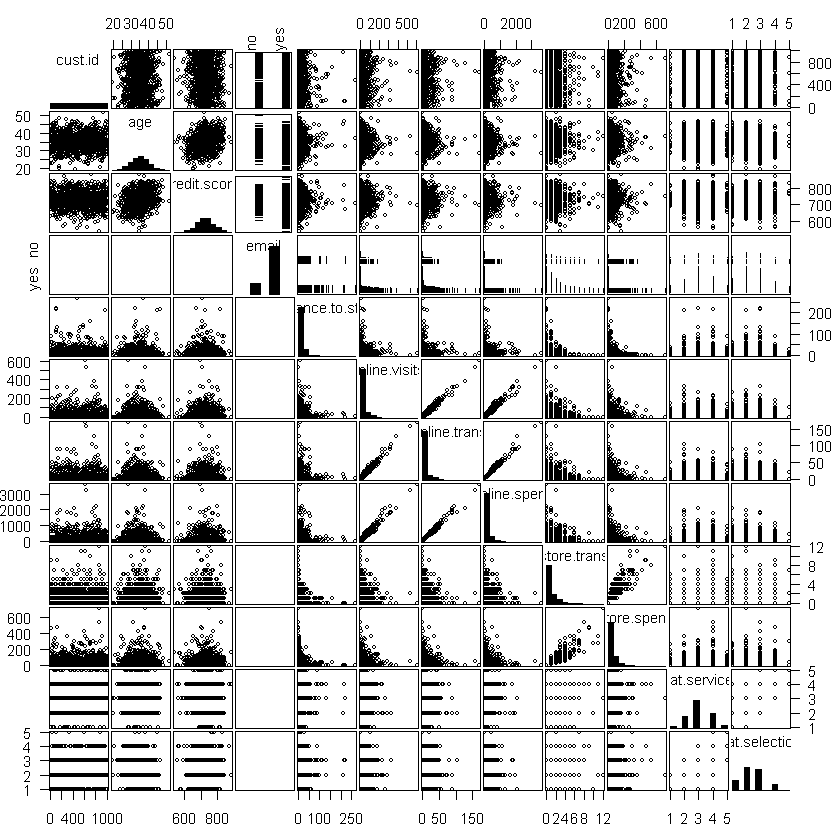

In [20]:
gpairs(cust.df)

>Fig. 9.1. Visualization of the customer data using gpairs(). Several variables have extreme
skew and other pairs are nearly perfectly correlated; both situations pose problems for linear
modeling.

#### Our first step to remediate the situation is to transform the data using a Box–Cox transformation. Building on the transformation routines we saw in Sect. 4.5.5, we write a short function that uses BoxCox.lambda() from the forecast package to select the transformation lambda automatically [82]. At the same time, we standardize the data with scale() (Sect. 7.3.3):

In [25]:
autoTransform = function(x) {
    library(forecast)
    return(scale(BoxCox(x, BoxCox.lambda(x))))
}

In [22]:
install.packages('forecast')

Installing package into 'C:/Users/cl44343/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
also installing the dependencies 'tseries', 'fracdiff', 'RcppArmadillo'



package 'tseries' successfully unpacked and MD5 sums checked
package 'fracdiff' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Temp\RtmpcfPgJM\downloaded_packages


We select the complete cases from our data frame, dropping the customer ID column ([, -1]) because it is not a predictor. Then we take only the rows with positive online spend. We create a vector to index all the columns except email (which is not numeric), and then lapply() the autoTransform() function to each numeric column:

In [26]:
cust.df.bc = cust.df[complete.cases(cust.df), -1]
cust.df.bc = subset(cust.df.bc, online.spend>0)
numcols    = which(colnames(cust.df.bc) != 'email')
cust.df.bc[, numcols] = lapply(cust.df.bc[, numcols], autoTransform)

In [27]:
cust.df.bc

,age,credit.score,email,distance.to.store,online.visits,online.trans,online.spend,store.trans,store.spend,sat.service,sat.selection
1,-2.428952884,-1.933850081,yes,-0.94785696,0.05805482,-0.53240767,-0.55554635,1.0216787,0.9457336,-0.09177965,0.7455990
2,-1.287236516,0.495559147,yes,1.41401190,1.22896924,1.31082233,1.27381034,-1.3303670,-1.3373428,-0.09177965,0.7455990
5,0.912814899,0.207989894,no,0.98442207,0.44946213,0.50346426,0.45244103,-1.3303670,-1.3373428,-2.24116588,-1.6476883
7,-1.234694402,0.025724045,yes,0.23794532,-2.54780116,-1.61057727,-1.70800915,0.7660742,0.7551173,-0.09177965,0.7455990
8,0.465979291,0.495587591,yes,-0.01619594,0.65906657,0.62047038,0.60753351,1.0216787,0.7936471,-1.21839266,0.7455990
10,-1.604259094,1.214532691,no,-0.05469028,-0.20545270,0.04922013,0.07635248,0.9120130,0.8703658,-0.09177965,-0.3270153
11,1.518406861,-0.022663114,no,-0.05312508,-1.85922292,-1.61057727,-1.61965900,-1.3303670,-1.3373428,-0.09177965,-0.3270153
14,-0.465559651,0.184306554,no,-0.54368981,1.16226573,1.07124343,1.14417814,0.9120130,0.7554584,-2.24116588,-0.3270153
19,0.556484358,-0.359720222,yes,-1.63142802,-0.10548064,0.16931824,0.22459895,-1.3303670,-1.3373428,-1.21839266,-0.3270153
22,-0.003696186,1.734430624,yes,0.92978069,0.18846650,0.04922013,0.07177407,0.5382470,0.5223391,-1.21839266,-1.6476883


>The result is a data frame with standardized, more normally distributed values, which we can check with summary() and gpairs():

In [28]:
summary(cust.df.bc)

        age.V1          credit.score.V1   email     distance.to.store.V1
 Min.   :-2.6028151   Min.   :-3.549645   no : 67   Min.   :-4.151249   
 1st Qu.:-0.6102340   1st Qu.:-0.664190   yes:351   1st Qu.:-0.642231   
 Median : 0.0319899   Median : 0.024254             Median : 0.110540   
 Mean   : 0.0000000   Mean   : 0.000000             Mean   : 0.000000   
 3rd Qu.: 0.6444580   3rd Qu.: 0.687857             3rd Qu.: 0.723209   
 Max.   : 2.4751221   Max.   : 2.691592             Max.   : 2.235170   
   online.visits.V1     online.trans.V1      online.spend.V1   
 Min.   :-2.5478012   Min.   :-1.6105773   Min.   :-1.9847582  
 1st Qu.:-0.6422584   1st Qu.:-0.9065743   1st Qu.:-0.7686352  
 Median : 0.1265838   Median : 0.1092692   Median : 0.1358798  
 Mean   : 0.0000000   Mean   : 0.0000000   Mean   : 0.0000000  
 3rd Qu.: 0.8231873   3rd Qu.: 0.8739755   3rd Qu.: 0.8897866  
 Max.   : 1.7768679   Max.   : 1.8204545   Max.   : 1.7784232  
    store.trans.V1       store.spend.V1  

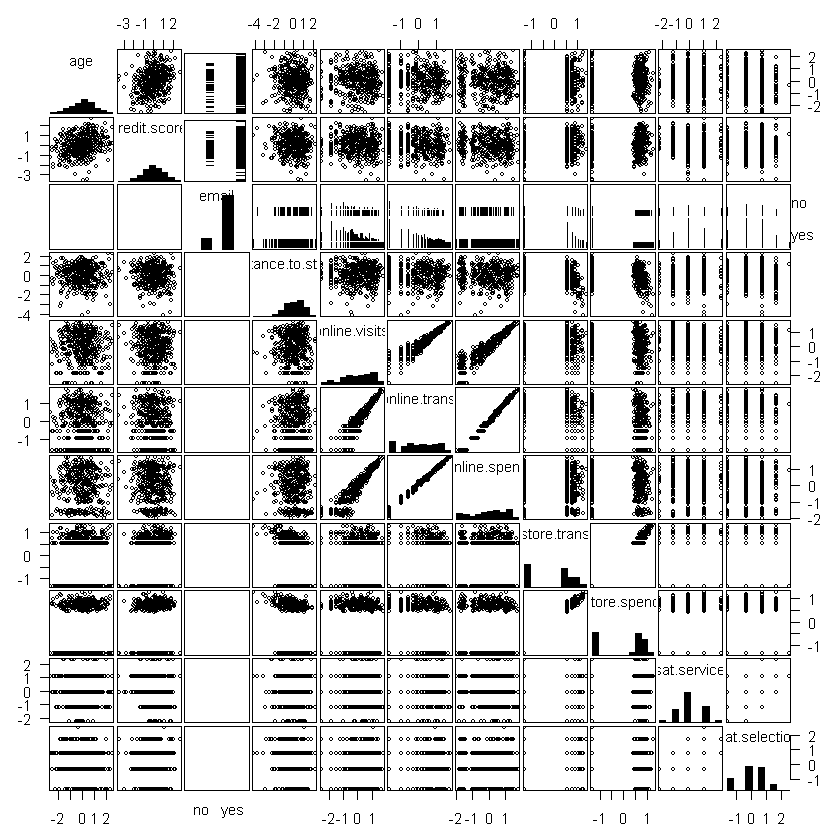

In [30]:
gpairs(cust.df.bc)

We refit the model using the transformed data:

In [31]:
spend.m2 = lm(online.spend ~., data=cust.df.bc)
summary(spend.m2)


Call:
lm(formula = online.spend ~ ., data = cust.df.bc)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38976 -0.05409  0.00027  0.05591  0.26628 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.0059639  0.0108943  -0.547    0.584    
age                0.0001875  0.0044821   0.042    0.967    
credit.score      -0.0026632  0.0045185  -0.589    0.556    
emailyes           0.0071023  0.0119316   0.595    0.552    
distance.to.store -0.0020362  0.0048800  -0.417    0.677    
online.visits     -0.0003913  0.0126165  -0.031    0.975    
online.trans       0.9960378  0.0126687  78.622   <2e-16 ***
store.trans       -0.0266674  0.0480675  -0.555    0.579    
store.spend        0.0274099  0.0475888   0.576    0.565    
sat.service        0.0059429  0.0052732   1.127    0.260    
sat.selection      0.0030628  0.0052624   0.582    0.561    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error:

> The coefficients are smaller now because the data have been standardized. Transforming and standardizing the data, although a good idea, have not changed the unbelievable estimate that online spend is highly related to transactions yet unrelated to visits.

In [32]:
spend.m3 = lm(online.spend ~ online.trans, data=cust.df.bc)
anova(spend.m3, spend.m2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
416,3.153871,NA,NA,NA,NA
407,3.113870,9,0.04000116,0.5809303,0.8129412


>Indeed, the full model is no better than one that simply predicts spending from the number of transactions alone (see Sect. 6.5.1 on using anova() to compare models). The small difference between the model fits is reflected in the high p-value (p = 0.8129), and thus the null hypothesis of no difference between the models cannot be rejected.

#### The problem here is *collinearity*: because visits and transactions are so highly related, and also because a linear model assumes that effects are additive, an effect attributed to one variable (such as transactions) is not available in the model to be attributed jointly to another that is highly correlated (visits). This will cause the standard errors of the predictors to increase, which means that the coefficient estimates will be highly uncertain or unstable. As a practical consequence, this may cause coefficient estimates to differ dramatically from sample to sample due to minor variations in the data even when underlying relationships are the same.

### **9.1.2 Remediating Collinearity**

The degree of collinearity in data can be assessed as the *variance inflation factor* (VIF). This estimates how much the standard error (variance) of a coefficient in a linear model is increased because of shared variance with other variables, compared to the situation if the variables were uncorrelated or simple single predictor regression were performed.

In [34]:
library(car)

In [35]:
vif(spend.m2)

age      credit.score             email distance.to.store 
         1.094949          1.112784          1.046874          1.297978 
    online.visits      online.trans       store.trans       store.spend 
         8.675817          8.747756        125.931383        123.435407 
      sat.service     sat.selection 
         1.515576          1.509377

> A common rule of thumb is that **VIF > 5.0 indicates the need to mitigate collinearity.** In spend.m2, the VIF suggests that collinearity should be addressed for the online... and store... variables.

#### There are three general strategies for mitigating collinearity:
 + Omit variables that are highly correlated.
 + Eliminate correlation by extracting principal components or factors for sets of highly correlated predictors (see Chap. 8).
 + Use a method that is robust to collinearity, i.e., something other than traditional linear modeling. There are too many options to consider this possibility exhaustively, but one method to consider would be a random forest approach, which only uses a subset of variables at a time (see Sect. 11.4.2).

Another option for the present data would be to construct a new measure of interest
that combines the collinear variables (such as spend per transaction). For purposes
here, we explore the first two options above and create models spend.m4 and
spend.m5.

In [40]:
spend.m4 = lm(online.spend ~ . -online.trans - store.trans, data=cust.df.bc)
vif(spend.m4)
summary(spend.m4)

age      credit.score             email distance.to.store 
         1.081411          1.103586          1.033945          1.211607 
    online.visits       store.spend       sat.service     sat.selection 
         1.026148          1.215208          1.507866          1.509001


Call:
lm(formula = online.spend ~ . - online.trans - store.trans, data = cust.df.bc)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.36373 -0.13135  0.05888  0.18476  1.03794 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.0923395  0.0435047  -2.123   0.0344 *  
age               -0.0333779  0.0178813  -1.867   0.0627 .  
credit.score      -0.0084524  0.0180637  -0.468   0.6401    
emailyes           0.1099655  0.0476011   2.310   0.0214 *  
distance.to.store  0.0001702  0.0189271   0.009   0.9928    
online.visits      0.9295374  0.0174184  53.365   <2e-16 ***
store.spend        0.0092463  0.0189552   0.488   0.6260    
sat.service       -0.0121405  0.0211147  -0.575   0.5656    
sat.selection      0.0048591  0.0211226   0.230   0.8182    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3511 on 409 degrees of freedom
Multiple R-squared:  0.8791,	Adjusted R-squared:  0.8767 
F

> The VIF is now acceptable and we see that online visits are now the best predictor
of online spend, although email status and age are also slightly related.

Another approach is to use the principal components of the correlated data. As you
will recall from Chap. 8, principal components are uncorrelated (orthogonal). Thus,
PCA provides a way to extract composite variables that are guaranteed to be free of
collinearity with other variables that are included in the same PCA.

In [49]:
pc.online = prcomp(cust.df.bc[, c('online.visits', 'online.trans')])
cust.df.bc$online = -pc.online$x[ ,1]  #transform direction of PC1 to positive
pc.store  = prcomp(cust.df.bc[, c('store.trans', 'store.spend')])
cust.df.bc$store  = -pc.store$x[ ,1]   #transform direction of PC1 to positive

> We use PCA to extract the first component for the online variables, and then do
this again for the store variables, and add those two initial components to the data
frame

In [50]:
spend.m5 = lm(online.spend ~ email + age + credit.score + distance.to.store +
              sat.service + sat.selection + online + store, data=cust.df.bc)
summary(spend.m5)
vif(spend.m5)


Call:
lm(formula = online.spend ~ email + age + credit.score + distance.to.store + 
    sat.service + sat.selection + online + store, data = cust.df.bc)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.83697 -0.08532  0.01288  0.09664  0.73327 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -3.928e-02  2.410e-02  -1.630   0.1039    
emailyes           4.678e-02  2.638e-02   1.773   0.0769 .  
age               -1.695e-02  9.882e-03  -1.715   0.0871 .  
credit.score      -3.649e-03  9.981e-03  -0.366   0.7148    
distance.to.store -2.666e-05  1.051e-02  -0.003   0.9980    
sat.service       -2.762e-03  1.167e-02  -0.237   0.8130    
sat.selection      3.153e-03  1.167e-02   0.270   0.7872    
online             7.019e-01  6.933e-03 101.247   <2e-16 ***
store              2.712e-03  7.455e-03   0.364   0.7162    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1941 on 409 degrees of

email               age      credit.score distance.to.store 
         1.039458          1.081430          1.103206          1.224019 
      sat.service     sat.selection            online             store 
         1.508487          1.509001          1.032362          1.228073

> VIF poses no problem in this model, and we see that online spend is still associated
primarily with online activity (as captured in the first component of the PCA
model, online) and perhaps slightly with email status and age. One caution when
interpreting results that use principal components as explanatory variables is that the
components have arbitrary numerical direction; the negative coefficient for online
here does not imply that online activity results in lower sales.

## 9.2 Linear Models for Binary Outcomes: Logistic Regression

### 9.2.1 Basics of the Logistic Regression Model

#### The core feature of a logistic model is this: it relates the probability of an outcome to an exponential function of a predictor variable

By modeling the probability of an outcome, a logistic model accomplishes two
things. First, it more directly models what we’re interested in, which is a probability
or proportion, such as the likelihood of a given customer to purchase a product, or
the expected proportion of a segment who will respond to a promotion. Second, it
limits the model to the appropriate range for a proportion, which is [0,1]. A basic
linear model as generated with lm() does not have such a limit and could estimate
a nonsensical probability such as 1.05 or −0.04.

$logistic : p(y) = $$e^{vx} \over (e^{vx} +1)$

>In this equation, the outcome of interest is y, and we compute its likelihood p(y)
as a function of vx. We typically estimate vx as a function of the features (x) of
a product, such as price. vx can take any real value, so we are able to treat it as a
continuous function in a linear model. In that case, vx is composed from one or more
coefficients of the model and indicates the importance of the corresponding features
of the product. This formula gives a value between [0,1]. The likelihood of y is less than 50 %
when vx is negative, is 50 % when vx = 0, and is above 50 % when vx is positive.We
compute this first by hand, and then switch to the equivalent, built-in plogis()
function:

In [52]:
exp(0) / (exp(0)+1)      # computing logistic by hand; could use plogis()

[1] 0.5

In [53]:
plogis(-Inf)             # infinitely low = likelihood 0

[1] 0

In [55]:
plogis(Inf)

[1] 1

In [56]:
plogis(2)                # moderate probability = 88% chance of outcome

[1] 0.8807971

In [57]:
plogis(-0.2)             # weak likelihood

[1] 0.450166

Such a model is known as a logit model, which determines the value of vx from the
logarithm of the relative probability of occurrence of y:

$logit : vx = $$log ({p(y)\over1− p(y)})$

Again, R includes a built-in function qlogis() for the logit function:

In [59]:
log(0.88/(1-0.88))     # moderate high likelihood

[1] 1.99243

In [60]:
qlogis(0.88)          # equivalent to hand computation

[1] 1.99243

In [61]:
?qlogis

### 9.2.2 Data for Logistic Regression of Season Passes

The marketing question is this: are customers more likely to
purchase the season pass when it is offered in the bundle (with free parking), or
not?

In [64]:
(pass.df = read.csv('http://goo.gl/J8MH6A'))

Channel,Promo,Pass
Mail,Bundle,YesPass
Mail,Bundle,YesPass
Mail,Bundle,YesPass
Mail,Bundle,YesPass
Mail,Bundle,YesPass
Mail,Bundle,YesPass
Mail,Bundle,YesPass
Mail,Bundle,YesPass
Mail,Bundle,YesPass
Mail,Bundle,YesPass


In [66]:
pass.df$Promo = factor(pass.df$Promo, levels=c('NoBundle', 'Bundle'))
summary(pass.df)

  Channel          Promo           Pass     
 Email: 633   NoBundle:1482   NoPass :1567  
 Mail :1328   Bundle  :1674   YesPass:1589  
 Park :1195                                 

To convert the data into such format, we first recreate the cross-tab data table in R.
We begin this by reading the values from table of one column and row at a time,
putting them into a vector:

In [68]:
(pass.tab = c(242, 639, 38, 359, 284, 27, 449, 223, 83, 278, 49, 485))

[1] 242 639  38 359 284  27 449 223  83 278  49 485

In [70]:
(dim(pass.tab) = c(3,2,2))

[1] 3 2 2

In [73]:
class(pass.tab) = 'table'

In [76]:
dimnames(pass.tab) = list(Channel = c('Mail', 'Park', 'Email'),
                           Promo   = c('Bundle', 'NoBundle'),
                           Pass    = c('YesPass', 'NoPass'))

>We add the marginal labels to the table by setting its dimnames attribute:

In [78]:
pass.tab

, , Pass = YesPass

       Promo
Channel Bundle NoBundle
  Mail     242      359
  Park     639      284
  Email     38       27

, , Pass = NoPass

       Promo
Channel Bundle NoBundle
  Mail     449      278
  Park     223       49
  Email     83      485


>We describe more about class, table, and dimnames in optional Sect. 9.2.4
below.

### 9.2.4 Language Brief: Classes and Attributes of Objects*

In [79]:
class(c(1, pi, exp(1)))

[1] "numeric"

In [80]:
class(data.frame(1:10))

[1] "data.frame"

In [81]:
str(pass.tab)

 table [1:3, 1:2, 1:2] 242 639 38 359 284 27 449 223 83 278 ...
 - attr(*, "dimnames")=List of 3
  ..$ Channel: chr [1:3] "Mail" "Park" "Email"
  ..$ Promo  : chr [1:2] "Bundle" "NoBundle"
  ..$ Pass   : chr [1:2] "YesPass" "NoPass"


In [82]:
is.table(pass.tab)
is.character(pass.tab)
is.numeric(pass.tab)

[1] TRUE

[1] FALSE

[1] TRUE

In [86]:
attributes(pass.tab)

$dim
[1] 3 2 2

$class
[1] "table"

$dimnames
$dimnames$Channel
[1] "Mail"  "Park"  "Email"

$dimnames$Promo
[1] "Bundle"   "NoBundle"

$dimnames$Pass
[1] "YesPass" "NoPass"

### 9.2.5 Finalizing the Data

In [88]:
install.packages('vcdExtra')

Installing package into 'C:/Users/cl44343/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
also installing the dependencies 'qvcalc', 'relimp', 'gnm', 'ca'



package 'qvcalc' successfully unpacked and MD5 sums checked
package 'relimp' successfully unpacked and MD5 sums checked
package 'gnm' successfully unpacked and MD5 sums checked
package 'ca' successfully unpacked and MD5 sums checked
package 'vcdExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Temp\RtmpcfPgJM\downloaded_packages


In [89]:
library(vcdExtra)

Loading required package: vcd
Warning message:
"package 'vcd' was built under R version 3.4.4"Loading required package: gnm

Attaching package: 'gnm'

The following object is masked from 'package:lattice':

    barley


Attaching package: 'vcdExtra'

The following object is masked from 'package:car':

    Burt



We have the data in a table pass.tab, which is suitable for analysis as is. However,
because most data sets come in the form of an extended data frame with one
observation per respondent, we expand it from a table to a complete data frame so
the analysis will match typical data structures.

In [91]:
pass.df = expand.dft(pass.tab)
str(pass.df)

'data.frame':	3156 obs. of  3 variables:
 $ Channel: Factor w/ 3 levels "Email","Mail",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Promo  : Factor w/ 2 levels "Bundle","NoBundle": 1 1 1 1 1 1 1 1 1 1 ...
 $ Pass   : Factor w/ 2 levels "NoPass","YesPass": 2 2 2 2 2 2 2 2 2 2 ...


We can use table() on this data to create cross-tabs other than those in Table
9.1. For example, to see purchases of a pass (Pass) by promotion bundle
(Promo):

In [92]:
table(pass.df$Pass, pass.df$Promo)

         
          Bundle NoBundle
  NoPass     755      812
  YesPass    919      670

We might think that NoBundle should have a lower implicit value (such
as “bundle = 0”) than Bundle (which might be “bundle = 1”). However, in the
table we just saw, NoBundle appears in the second column because it has a higher
value thanks to alphabetic ordering.

In [93]:
pass.df$Promo = factor(pass.df$Promo, levels=c('NoBundle', 'Bundle'))
table(pass.df$Pass, pass.df$Promo)

         
          NoBundle Bundle
  NoPass       812    755
  YesPass      670    919

### 9.2.6 Fitting a Logistic Regression Model

#### A GLM can handle dependent variables that are not normally distributed. Thus, GLM can be used to model data counts (such as number of purchases) or time intervals (such as time spent on a website) or binary variables (e.g., did/didn’t purchase).

The common feature of all GLM models is that they relate
normally distributed predictors to a non-normal outcome using a function known as
a *link*. This means that they are able to fit models for many different distributions
using a single, consistent framework. In the present case, we model a binary outcome, and the appropriate distribution is a
*binomial* distribution (see Sect. 6.3)

In [95]:
pass.m1 = glm(Pass ~ Promo, data=pass.df, family=binomial)
summary(pass.m1)


Call:
glm(formula = Pass ~ Promo, family = binomial, data = pass.df)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.262  -1.097   1.095   1.095   1.260  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.19222    0.05219  -3.683 0.000231 ***
PromoBundle  0.38879    0.07167   5.425 5.81e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4375.0  on 3155  degrees of freedom
Residual deviance: 4345.4  on 3154  degrees of freedom
AIC: 4349.4

Number of Fisher Scoring iterations: 3


>There is a positive coefficient for the bundle condition, and the effect is statistically
significant. What does a coefficient of 0.3888 mean? We can use it to calculate the association
of pass sales, as associated with the promotion bundle factor, by examining the ratio
of success (using plogis()) to non-success (1−success).

In [96]:
plogis(0.3888) / (1-plogis(0.3888))    # ratio of outcome % to alternative %

[1] 1.475209

> #### This shows that the effect of Bundle is an estimated *odds ratio* of 1.475, meaning that customers are 1.475 times more likely to purchase the pass when it is offered in the bundle. Another way to think about this is that the bundle increases the purchase likelihood by 47.5 %. An easier and equivalent way to calculate this is to exponentiate the coefficient :

In [97]:
exp(0.3888)                             # identical

[1] 1.475209

We can find the odds ratios from the model by extracting the coefficients with
coef() and using exp():

In [98]:
exp(coef(pass.m1))

(Intercept) PromoBundle 
  0.8251232   1.4751962

We can obtain a confidence interval for the odds ratio using exp(confint
(model)):

In [99]:
exp(confint(pass.m1))

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),0.744749,0.9138654
PromoBundle,1.282055,1.6979776


> The odds ratio for the promotion bundle is estimated to be 1.28–1.70, a significant
positive effect. This demonstrates that the promotion is highly effective, right? Not
necessarily, because the effects are estimated *under the assumption that the model
is the one we want to interpret*. But is the model Pass ∼ Promo really the one
we should interpret?